In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Шаг 1. Загрузим данные и проверим их.

In [2]:
costs = pd.read_csv('C:\\Users\\Igor\\Desktop\\data_analyst\\4 project\\costs.csv')

In [3]:
orders_log = pd.read_csv('C:\\Users\\Igor\\Desktop\\data_analyst\\4 project\\orders_log.csv')

In [4]:
visits_log = pd.read_csv('C:\\Users\\Igor\\Desktop\\data_analyst\\4 project\\visits_log.csv')

In [5]:
costs.head(2000)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
1995,9,2017-11-27,24.74
1996,9,2017-11-28,15.67
1997,9,2017-11-29,18.65
1998,9,2017-11-30,24.51


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [7]:
costs['dt'] = pd.to_datetime(costs['dt'])

In [8]:
orders_log.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders_log['Buy Ts'] = pd.to_datetime(orders_log['Buy Ts'])

In [11]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [12]:
visits_log['End Ts'] = pd.to_datetime(visits_log['End Ts'])

In [13]:
visits_log['Start Ts'] = pd.to_datetime(visits_log['Start Ts'])

## Шаг 2. Рассчитаем метрики

### 2.1 Продуктовые метрики

#### 2.1.1 DAU, WAU, MAU

In [14]:
visits_log['date'] = visits_log['Start Ts'].dt.date

In [15]:
visits_log['week'] = visits_log['Start Ts'].dt.isocalendar().week

In [16]:
visits_log['month'] = visits_log['Start Ts'].dt.month

In [17]:
visits_log['year'] = visits_log['Start Ts'].dt.year

In [18]:
visits_log

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7,2017
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017


In [19]:
dau = visits_log.groupby('date').agg({'Uid': 'nunique'})
mau = visits_log.groupby(['month', 'year']).agg({'Uid': 'nunique'})
wau = visits_log.groupby(['year','week']).agg({'Uid':'nunique'})

### DAU

Среднее значение DAU за весь переод = 907.99


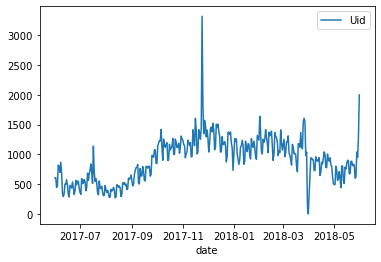

In [20]:
dau.plot(y='Uid')
print("Среднее значение DAU за весь переод = {:.5}".format(dau.mean()['Uid']))

### WAU

Среднее значение WAU за весь переод = 5716.2


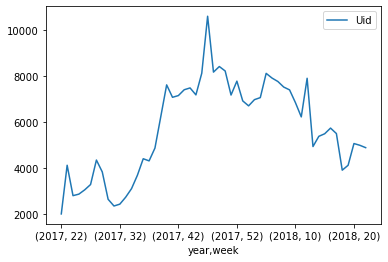

In [21]:
wau.plot(y='Uid')
print("Среднее значение WAU за весь переод = {:.5}".format(wau.mean()['Uid']))

### MAU

Среднее значение MAU за весь переод = 23228.4


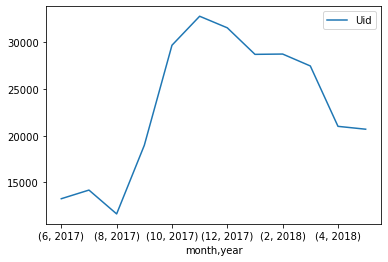

In [22]:
mau = mau.sort_index(level=1)
mau.plot(y='Uid')
print("Среднее значение MAU за весь переод = {:.6}".format(mau.mean()['Uid']))

### 2.1.2 Среднее кол-во посещений в день

Среднее количество посещений за день:  1003.0


<AxesSubplot:>

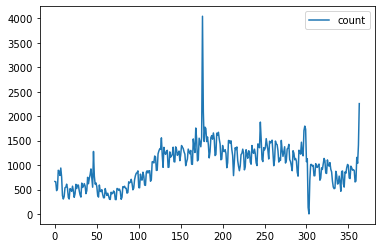

In [23]:
avg_visits_of_day = visits_log.groupby('date')['Uid'].count()
avg_visits_of_day = pd.DataFrame({'date': avg_visits_of_day.index, 'count' : avg_visits_of_day.values})
print("Среднее количество посещений за день: ", avg_visits_of_day['count'].median())
avg_visits_of_day.plot(y='count')

### 2.1.3 Средняя продолжительность сессии

In [24]:
visits_log['time'] = (visits_log['End Ts'] - visits_log['Start Ts']) / np.timedelta64 ( 1 , 'D') * 24 * 60 * 60

In [25]:
visits_log= visits_log[visits_log['time'] != 0]
visits_log

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year,time
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,1680.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,1440.0
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,9,2017,60.0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,5,1,2018,3360.0
...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7,2017,19.0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018,19.0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018,19.0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017,19.0


В среднем пользователи на сайте проводят  360.0 секунд


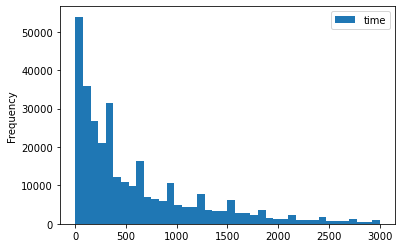

In [26]:
visits_log.plot(y=['time'], kind = 'hist', bins = 40, range = (0,3000))
print("В среднем пользователи на сайте проводят ",visits_log['time'].median(),"секунд")

### 2.1.4 Расчет Retention Rate

In [27]:
visits = visits_log[['Uid','date']]
first_activity = visits.groupby('Uid').agg({'date' : 'min'})
first_activity.columns = ['first_activity']
first_activity

,first_activity
Uid,
11863502262781,2018-03-01
49537067089222,2018-02-06
297729379853735,2017-06-07
313578113262317,2017-09-18
325320750514679,2017-09-30
...,...
18446316582013423015,2018-02-26
18446403737806311543,2017-11-30
18446556406699109058,2018-01-01


In [28]:
visits = visits.join(first_activity, on='Uid')
visits['first_month'] = visits['first_activity'].astype('datetime64[M]')
visits['current_month'] = visits['date'].astype('datetime64[M]')
visits['lifetime'] = ((visits['current_month']- visits['first_month']) / np.timedelta64(1, 'M')).round().astype('int')
visits

,Uid,date,first_activity,first_month,current_month,lifetime
0,16879256277535980062,2017-12-20,2017-12-20,2017-12-01,2017-12-01,0
1,104060357244891740,2018-02-19,2018-02-19,2018-02-01,2018-02-01,0
3,16174680259334210214,2018-05-20,2018-03-09,2018-03-01,2018-05-01,2
5,16007536194108375387,2017-09-03,2017-09-03,2017-09-01,2017-09-01,0
6,6661610529277171451,2018-01-30,2017-06-29,2017-06-01,2018-01-01,7
...,...,...,...,...,...,...
359395,18363291481961487539,2017-07-29,2017-07-29,2017-07-01,2017-07-01,0
359396,18370831553019119586,2018-01-25,2018-01-25,2018-01-01,2018-01-01,0
359397,18387297585500748294,2018-03-03,2018-03-03,2018-03-01,2018-03-01,0
359398,18388616944624776485,2017-11-02,2017-11-02,2017-11-01,2017-11-01,0


In [29]:
cohorts_visits = visits.groupby(['first_month','lifetime']).agg({'Uid':'nunique'}).reset_index()
initial_users_count = cohorts_visits[cohorts_visits['lifetime']==0][['first_month','Uid']]
initial_users_count.columns = ['first_month','cohort_users']
initial_users_count = initial_users_count.set_index('first_month')
cohorts_visits = cohorts_visits.join(initial_users_count, on='first_month')

cohorts_visits.head(10)

,first_month,lifetime,Uid,cohort_users
0,2017-06-01,0,11885,11885
1,2017-06-01,1,900,11885
2,2017-06-01,2,606,11885
3,2017-06-01,3,710,11885
4,2017-06-01,4,777,11885
5,2017-06-01,5,802,11885
6,2017-06-01,6,686,11885
7,2017-06-01,7,667,11885
8,2017-06-01,8,606,11885
9,2017-06-01,9,591,11885


In [30]:
cohorts_visits['retention'] = cohorts_visits['Uid'] / cohorts_visits['cohort_users']

In [31]:
retention_pivot = cohorts_visits.pivot_table(index='first_month',columns='lifetime', values='retention')
retention_pivot = retention_pivot.reset_index()
retention_pivot['first_month'] = retention_pivot['first_month'].dt.strftime('%Y-%m')
retention_pivot = retention_pivot.set_index('first_month')
retention_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,1.0,0.075726,0.050989,0.059739,0.065377,0.067480,0.057720,0.056121,0.050989,0.049727,0.038115,0.043921
2017-07,1.0,0.054545,0.050402,0.055645,0.056660,0.046512,0.044059,0.044059,0.037886,0.027315,0.027061,NaN
2017-08,1.0,0.074452,0.060451,0.060451,0.047970,0.041459,0.036249,0.037660,0.027133,0.024745,NaN,NaN
2017-09,1.0,0.083570,0.067769,0.049322,0.038083,0.036959,0.035372,0.022876,0.022744,NaN,NaN,NaN
2017-10,1.0,0.078129,0.050811,0.037811,0.033648,0.031184,0.020775,0.019798,NaN,NaN,NaN,NaN
2017-11,1.0,0.078183,0.042733,0.037824,0.032633,0.021729,0.020602,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.054668,0.036518,0.030178,0.019453,0.017716,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.057794,0.037817,0.024352,0.019249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.056561,0.024290,0.019184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


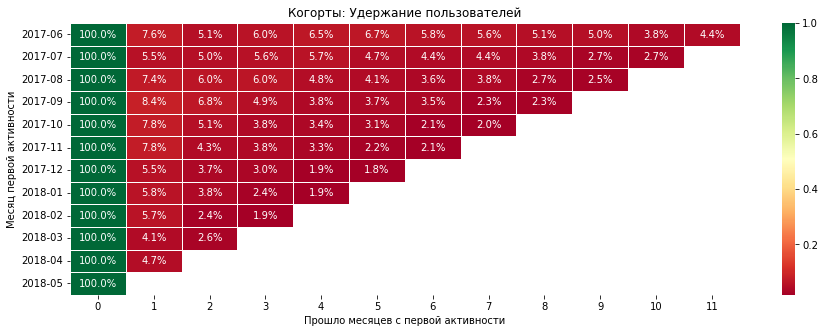

Как мы видим, возвращаются пользователи редко.


In [32]:
plt.figure(figsize=(15, 5))
plt.title('Когорты: Удержание пользователей')
sns.heatmap(retention_pivot, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn')
plt.ylabel('Месяц первой активности')
plt.xlabel('Прошло месяцев с первой активности')
plt.show()
print('Как мы видим, возвращаются пользователи редко.')

In [33]:
avg_retention = retention_pivot[2].mean()
print("Среднее значение Retention Rate на второй месяц жизни когорт {:.1%}".format(avg_retention))

Среднее значение Retention Rate на второй месяц жизни когорт 4.5%


## 2.2. Метрики электронной коммерции

### 2.2.1 Время от первого посещения до совершения покупки

In [34]:
first_orders = orders_log.groupby('Uid').agg({'Buy Ts': min}) 
orders = first_activity.reset_index().join(first_orders, on='Uid')
orders.dropna(subset=['Buy Ts'], inplace=True)
orders['Buy Ts'] = pd.to_datetime(orders["Buy Ts"])
orders['first_activity'] = pd.to_datetime(orders["first_activity"])
orders['buy_time'] = (orders['Buy Ts'] - orders['first_activity']) / np.timedelta64(1, 'D')
orders

,Uid,first_activity,Buy Ts,buy_time
3,313578113262317,2017-09-18,2018-01-03 21:51:00,107.910417
20,1575281904278712,2017-06-03,2017-06-03 10:13:00,0.425694
32,2429014661409475,2017-10-11,2017-10-11 18:33:00,0.772917
33,2464366381792757,2018-01-27,2018-01-28 15:54:00,1.662500
35,2551852515556206,2017-11-24,2017-11-24 10:14:00,0.426389
...,...,...,...,...
207000,18442290965339407211,2018-02-05,2018-02-05 19:39:00,0.818750
207028,18445407535914413204,2017-09-22,2017-09-22 23:55:00,0.996528
207033,18445601152732270159,2017-08-07,2018-03-26 22:54:00,231.954167
207044,18446156210226471712,2017-11-07,2018-02-18 19:34:00,103.815278


count    36081.000000
mean        16.076655
std         45.719546
min       -327.262500
25%          0.561806
50%          0.790972
75%          1.879167
max        363.732639
Name: buy_time, dtype: float64

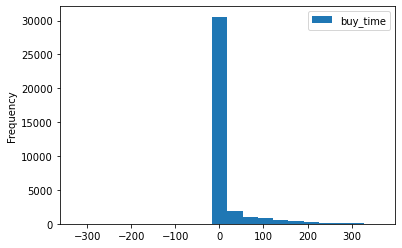

In [35]:
orders.plot(y='buy_time', kind='hist',bins=20,)
orders['buy_time'].describe()

### Вывод: большинство покупок делаются в первый день

### 2.2.2 Расчитаем среднее кол-во покупок на одного покупаетля

In [36]:
orders_log['date'] = orders_log['Buy Ts'].dt.date

In [37]:
orders_log

,Buy Ts,Revenue,Uid,date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31


In [38]:
first_order = orders_log.groupby('Uid').agg({'date' : 'min'})
first_order.columns = ['first_order']
orders = orders_log[['Uid','date','Revenue']]
orders = orders.join(first_order, on='Uid')
orders['first_month'] = orders['first_order'].astype('datetime64[M]')
orders['current_month'] = orders['date'].astype('datetime64[M]')
orders['lifetime'] = ((orders['current_month']- orders['first_month']) / np.timedelta64(1, 'M')).round().astype('int')


In [39]:
orders

,Uid,date,Revenue,first_order,first_month,current_month,lifetime
0,10329302124590727494,2017-06-01,17.00,2017-06-01,2017-06-01,2017-06-01,0
1,11627257723692907447,2017-06-01,0.55,2017-06-01,2017-06-01,2017-06-01,0
2,17903680561304213844,2017-06-01,0.37,2017-06-01,2017-06-01,2017-06-01,0
3,16109239769442553005,2017-06-01,0.55,2017-06-01,2017-06-01,2017-06-01,0
4,14200605875248379450,2017-06-01,0.37,2017-06-01,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...,...
50410,12296626599487328624,2018-05-31,4.64,2018-05-31,2018-05-01,2018-05-01,0
50411,11369640365507475976,2018-05-31,5.80,2018-05-31,2018-05-01,2018-05-01,0
50412,1786462140797698849,2018-05-31,0.30,2018-05-31,2018-05-01,2018-05-01,0
50413,3993697860786194247,2018-05-31,3.67,2018-05-31,2018-05-01,2018-05-01,0


In [40]:
cohorts_orders = orders.groupby(['first_month','lifetime']).agg({'Uid':['count','nunique'], 'Revenue': 'sum'}).reset_index()
cohorts_orders.columns = ['first_month','lifetime','orders','users', 'profit', 'count']
cohorts_orders['orders_per_users'] = cohorts_orders['orders'] / cohorts_orders['users']
cohorts_orders['orders_prfit'] = orders['Revenue']
cohorts_orders

,first_month,lifetime,orders,users,profit,count,orders_per_users,orders_prfit
0,2017-06-01,0,2354,2023,9557.49,2354,1.163618,17.00
1,2017-06-01,1,177,61,981.82,177,2.901639,0.55
2,2017-06-01,2,174,50,885.34,174,3.480000,0.37
3,2017-06-01,3,226,54,1931.30,226,4.185185,0.55
4,2017-06-01,4,292,88,2068.58,292,3.318182,0.37
...,...,...,...,...,...,...,...,...
74,2018-03-01,2,176,58,1114.87,176,3.034483,0.85
75,2018-04-01,0,2495,2276,10600.69,2495,1.096221,0.24
76,2018-04-01,1,195,69,1209.92,195,2.826087,3.30
77,2018-05-01,0,3249,2988,13925.76,3249,1.087349,5.38


In [41]:
orders_pivot = cohorts_orders.pivot_table(index='first_month',columns='lifetime', values='orders_per_users')
orders_pivot = orders_pivot.reset_index()
orders_pivot['first_month'] = orders_pivot['first_month'].dt.strftime('%Y-%m')
orders_pivot = orders_pivot.set_index('first_month')
orders_pivot

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,1.163618,2.901639,3.480000,4.185185,3.318182,3.253731,4.451613,3.702128,3.655172,3.400000,2.133333,1.622642
2017-07,1.136765,1.923077,2.105263,1.625000,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,NaN
2017-08,1.118978,1.862069,1.886792,1.840909,2.125000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09,1.136381,1.684615,1.610000,2.216216,1.288462,1.703125,1.636364,1.513514,1.418605,NaN,NaN,NaN
2017-10,1.143779,1.524272,1.317073,1.326087,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11,1.179368,1.788288,1.516667,1.990566,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12,1.152635,1.849315,1.961165,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.121554,1.964912,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.121611,1.881356,1.431034,1.794872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


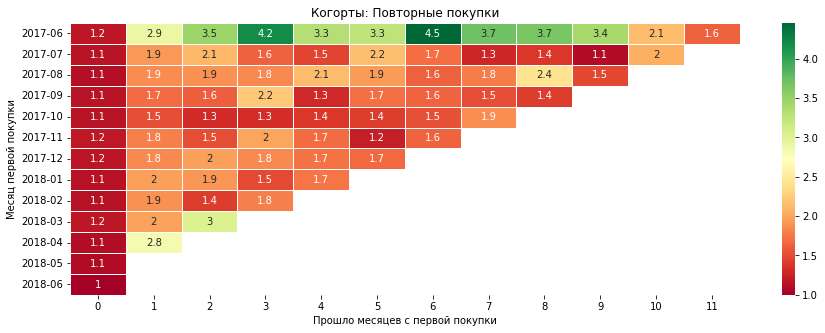

In [42]:
plt.figure(figsize=(15, 5))
plt.title('Когорты: Повторные покупки')
sns.heatmap(orders_pivot, annot=True, linewidths=.5, cmap = 'RdYlGn')
plt.ylabel('Месяц первой покупки')
plt.xlabel('Прошло месяцев с первой покупки')
plt.show()

### 2.2.3 Рассчитаем средний чек

In [43]:
cohort_LTV = orders.groupby(['first_month','lifetime']).agg({'Revenue': 'sum', 'Uid':'nunique'}).reset_index()
n_buyers = orders.groupby(['first_month']).agg({'Uid':'nunique'}).reset_index()
n_buyers.columns = ['first_month','n_buyers']
n_buyers = n_buyers.set_index('first_month')
cohort_LTV = cohort_LTV.join(n_buyers, on='first_month')
cohort_LTV['LTV'] = cohort_LTV['Revenue'] / cohort_LTV['n_buyers']
cohort_LTV['LTV_per_users'] = cohort_LTV['Revenue'] / cohort_LTV['Uid']
cohort_LTV

,first_month,lifetime,Revenue,Uid,n_buyers,LTV,LTV_per_users
0,2017-06-01,0,9557.49,2023,2023,4.724414,4.724414
1,2017-06-01,1,981.82,61,2023,0.485329,16.095410
2,2017-06-01,2,885.34,50,2023,0.437637,17.706800
3,2017-06-01,3,1931.30,54,2023,0.954671,35.764815
4,2017-06-01,4,2068.58,88,2023,1.022531,23.506591
...,...,...,...,...,...,...,...
74,2018-03-01,2,1114.87,58,3533,0.315559,19.221897
75,2018-04-01,0,10600.69,2276,2276,4.657597,4.657597
76,2018-04-01,1,1209.92,69,2276,0.531599,17.535072
77,2018-05-01,0,13925.76,2988,2988,4.660562,4.660562


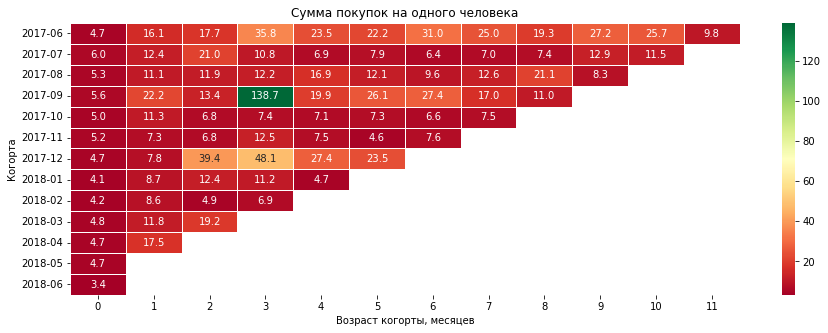

In [44]:
mean_check = cohort_LTV.pivot_table(index = 'first_month', columns = 'lifetime', values = 'LTV_per_users',aggfunc = 'mean')
mean_check = mean_check.reset_index()
mean_check['first_month'] = mean_check['first_month'].dt.strftime('%Y-%m')
mean_check = mean_check.set_index('first_month')
plt.figure(figsize=(15, 5))
plt.title('Сумма покупок на одного человека')
sns.heatmap(mean_check, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

### 2.2.4 Выясним, как меняется LTV на покупателя по когортам

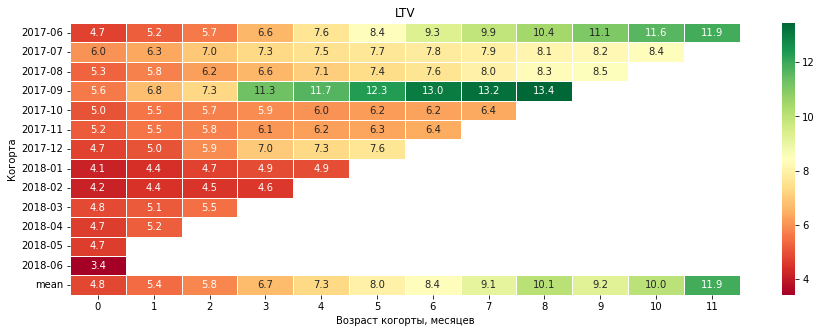

In [45]:
LTV_pivot = cohort_LTV.pivot_table(index = 'first_month', columns = 'lifetime', values = 'LTV',aggfunc = 'mean')
LTV_pivot = LTV_pivot.cumsum(axis = 1)
LTV_pivot = LTV_pivot.reset_index()
LTV_pivot['first_month'] = LTV_pivot['first_month'].dt.strftime('%Y-%m')
LTV_pivot = LTV_pivot.set_index('first_month')
LTV_pivot.loc['mean'] = LTV_pivot.mean()
LTV_pivot = LTV_pivot.round(2)
plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(LTV_pivot, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()


## 2.3 Маркетинговые метрики

### 2.3.1 Сумма расходов на маркетинг

Всего потрачено на маркетинг 329131.62


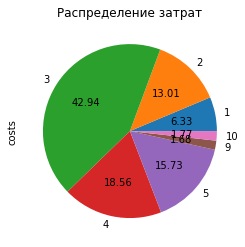

In [46]:
costs.groupby(by='source_id').sum().plot(y = 'costs' ,kind = 'pie', autopct='%.2f', legend= False, title="Распределение затрат")
print("Всего потрачено на маркетинг {}".format(costs['costs'].sum()))

In [47]:
costs['month'] = costs['dt'].astype('datetime64[M]').dt.strftime('%Y-%m')
costs_pivot = costs.pivot_table(index = 'month',columns = 'source_id', values = 'costs', aggfunc='sum')
costs_pivot

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


<AxesSubplot:xlabel='month'>

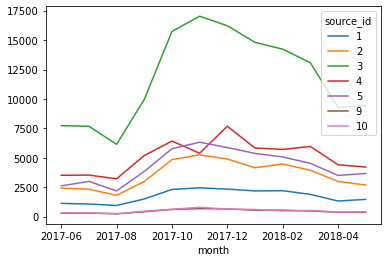

In [48]:
costs_pivot.plot()

<AxesSubplot:xlabel='month'>

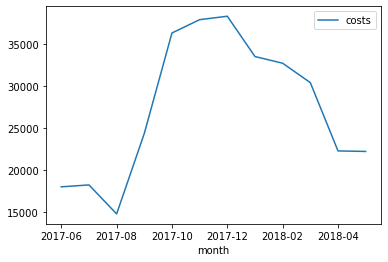

In [49]:
costs_sum = costs.groupby('month').sum()
costs_sum.plot(y='costs')

### 2.3.2 Рассчитаем САС для всего проекта

In [50]:
visits_sources_none = visits_log[['Uid', 'Start Ts', 'Source Id']]
visits_sources_none = visits_sources_none.join(first_orders['Buy Ts'], on='Uid')
visits_sources_none

,Uid,Start Ts,Source Id,Buy Ts
0,16879256277535980062,2017-12-20 17:20:00,4,NaT
1,104060357244891740,2018-02-19 16:53:00,2,NaT
3,16174680259334210214,2018-05-20 10:59:00,9,2018-03-09 20:25:00
5,16007536194108375387,2017-09-03 21:35:00,5,2017-09-04 12:46:00
6,6661610529277171451,2018-01-30 11:13:00,1,NaT
...,...,...,...,...
359395,18363291481961487539,2017-07-29 19:07:00,2,2017-07-29 19:07:00
359396,18370831553019119586,2018-01-25 17:38:00,1,2018-01-25 17:38:00
359397,18387297585500748294,2018-03-03 10:12:00,4,2018-03-03 10:12:00
359398,18388616944624776485,2017-11-02 10:12:00,5,2017-11-02 10:12:00


In [51]:
def before_first_purchase(row):
    if row['Start Ts'] <= row['Buy Ts']:
        return True
    else:
        return False
visits_sources_none['before_first_purchase'] = visits_sources_none.apply(before_first_purchase, axis = 1)

In [52]:
visits_sources_none['month'] = visits_sources_none['Start Ts'].astype('datetime64[M]').dt.strftime('%Y-%m')
visits_sources = visits_sources_none.loc[visits_sources_none['before_first_purchase'] == True]
visits_sources_pivot = visits_sources.pivot_table(index='month', columns = 'Source Id', values = 'Buy Ts', aggfunc='count')
visits_sources_pivot['visits_to_purchase'] = visits_sources_pivot.sum(axis = 1)
click_pivot = visits_sources_pivot[[1, 2, 3, 4, 5, 9, 10]]
for i in range(1,11):
    try:
        visits_sources_pivot[i] = visits_sources_pivot[i] / visits_sources_pivot['visits_to_purchase']
    except:
        0
visits_sources_pivot = visits_sources_pivot[[1, 2, 3, 4, 5, 9, 10]].round(2)

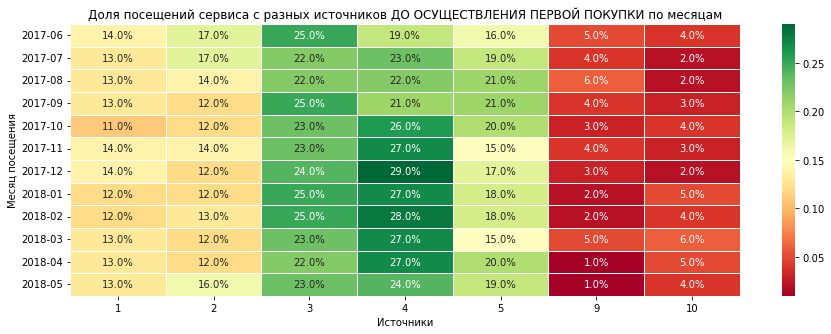

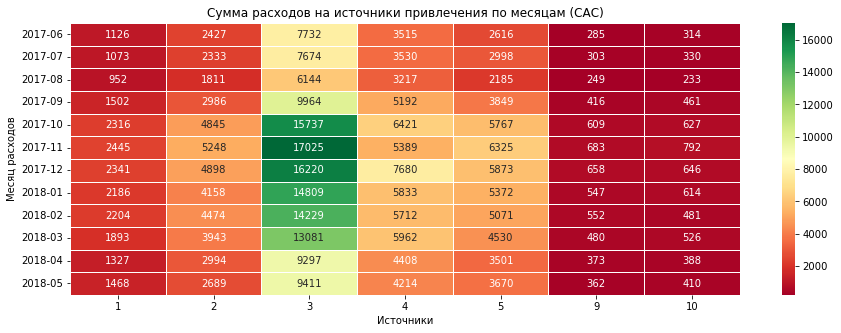

In [53]:
plt.figure(figsize=(15, 5))
plt.title('Доля посещений сервиса с разных источников ДО ОСУЩЕСТВЛЕНИЯ ПЕРВОЙ ПОКУПКИ по месяцам')
sns.heatmap(visits_sources_pivot, annot=True, fmt=".1%", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц посещения')
plt.show()

plt.figure(figsize=(15, 5))
plt.title('Сумма расходов на источники привлечения по месяцам (САС)')
sns.heatmap(costs_pivot, annot=True, fmt=".0f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Источники')
plt.ylabel('Месяц расходов')
plt.show()

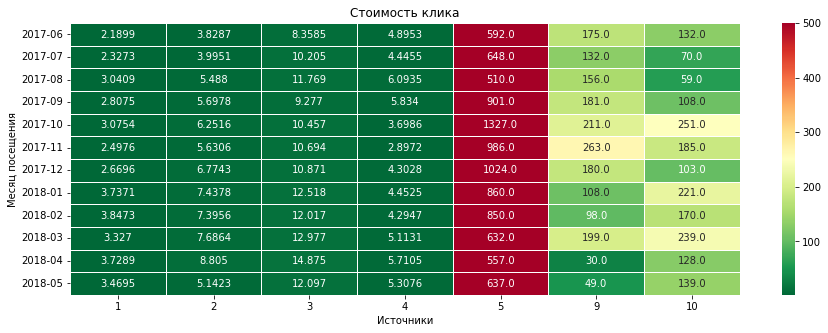

Source Id,1,2,3,4,5,9,10
month,,,,,,,
2017-06,2.189903,3.828675,8.358541,4.895265,592.0,175.0,132.0
2017-07,2.327289,3.995051,10.205279,4.445504,648.0,132.0,70.0
2017-08,3.040927,5.488030,11.769234,6.093485,510.0,156.0,59.0
2017-09,2.807495,5.697824,9.277048,5.834000,901.0,181.0,108.0
2017-10,3.075365,6.251613,10.456638,3.698641,1327.0,211.0,251.0
2017-11,2.497610,5.630558,10.694309,2.897215,986.0,263.0,185.0
2017-12,2.669555,6.774274,10.870992,4.302784,1024.0,180.0,103.0
2018-01,3.737060,7.437818,12.517988,4.452511,860.0,108.0,221.0
2018-02,3.847260,7.395603,12.017365,4.294707,850.0,98.0,170.0


In [54]:
for i in range(1,5):
    try:
        click_pivot[i] = costs_pivot[i] / click_pivot[i]
    except:
        0
plt.figure(figsize=(15, 5))
plt.title('Стоимость клика')
sns.heatmap(click_pivot, annot=True, linewidths=.5, fmt='.5', cmap = 'RdYlGn_r', vmax = 500)
plt.xlabel('Источники')
plt.ylabel('Месяц посещения')
plt.show()
click_pivot

### 2.3.3 Рассчитаем ROMI

In [55]:
cohort_LTV['first_month'] = cohort_LTV['first_month'].dt.strftime('%Y-%m')
cohort_LTV = cohort_LTV.set_index('first_month')
cohort_LTV

,lifetime,Revenue,Uid,n_buyers,LTV,LTV_per_users
first_month,,,,,,
2017-06,0,9557.49,2023,2023,4.724414,4.724414
2017-06,1,981.82,61,2023,0.485329,16.095410
2017-06,2,885.34,50,2023,0.437637,17.706800
2017-06,3,1931.30,54,2023,0.954671,35.764815
2017-06,4,2068.58,88,2023,1.022531,23.506591
...,...,...,...,...,...,...
2018-03,2,1114.87,58,3533,0.315559,19.221897
2018-04,0,10600.69,2276,2276,4.657597,4.657597
2018-04,1,1209.92,69,2276,0.531599,17.535072


In [56]:
cohort_LTV

,lifetime,Revenue,Uid,n_buyers,LTV,LTV_per_users
first_month,,,,,,
2017-06,0,9557.49,2023,2023,4.724414,4.724414
2017-06,1,981.82,61,2023,0.485329,16.095410
2017-06,2,885.34,50,2023,0.437637,17.706800
2017-06,3,1931.30,54,2023,0.954671,35.764815
2017-06,4,2068.58,88,2023,1.022531,23.506591
...,...,...,...,...,...,...
2018-03,2,1114.87,58,3533,0.315559,19.221897
2018-04,0,10600.69,2276,2276,4.657597,4.657597
2018-04,1,1209.92,69,2276,0.531599,17.535072


In [57]:
costs_by_month = costs.pivot_table(index = 'month', values = 'costs', aggfunc = 'sum').reset_index()
costs_by_month.columns = ['first_month', 'costs']
costs_by_month = costs_by_month.set_index('first_month')

In [58]:
cohort_LTV = cohort_LTV.join(costs_by_month, on = 'first_month')

In [59]:
cohort_LTV['cac'] = cohort_LTV['costs'] / cohort_LTV['n_buyers']
cohort_LTV = cohort_LTV[:-1]
cohort_LTV['romi'] = cohort_LTV['LTV'] / cohort_LTV['cac']
cohort_LTV = cohort_LTV.reset_index()

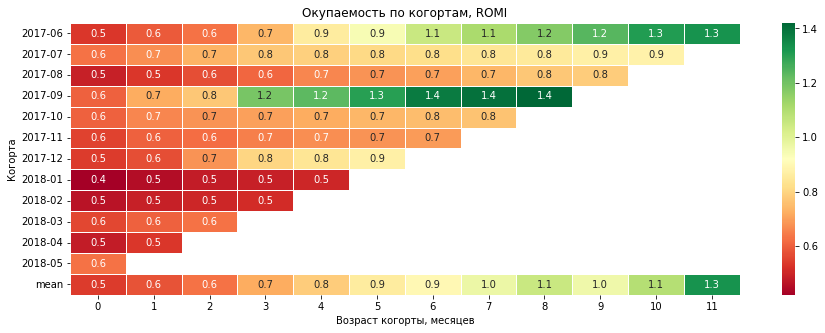

In [60]:
romi = cohort_LTV.pivot_table(
index = 'first_month', columns = 'lifetime', values = 'romi', aggfunc = 'mean')

romi = romi.cumsum(axis=1)
romi.loc['mean'] = romi.mean()
romi = romi.round(2)

plt.figure(figsize=(15, 5))
plt.title('Окупаемость по когортам, ROMI')
sns.heatmap(romi, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlGn')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()


## 3. Выводы и рекомендации
### 3.1 На какие источники трафика стоит делать упор
По таблице цены за клик видно, что самые выгодные источники это 1, 2 и 4.
Самым невыгодным по цене за клик является источник № 5. Можно порекомендовать отказатся от источников 5, 9, 10, так как в сумме они дают 25% траффика, но цена за клик в десятки раз выше чем у других источников
### 3.2 Выводы, сделаные после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции
#### 3.2.1 Маректинговые метрики
Подсчитав ROMI мы выяснили, что в среднем затраты себя окупают только на 7 месяц жизни когорт, возможно если пересмотреть бюджет на источники трафика по рекомендациям выше, то получится ускорить возврат вложений. 
#### 3.2.2 Продуктовые метрики
Наимболее популярным сайт был в конце 2017 года, в те дни было наибольшее количество новых пользователей. Пользователи очень редко возвращаются на сайт, но в первый месяц имеющихся данных повторных покупок было гораздо больше, возможно есть какая то причина.
#### 3.2.3 Метрики электронной коммерции
Заметим, что наибольшее количество покупок делаются в первый день, как пользователь зашел на сайт, значит можно сделать вывод о том, что чем больше вкладывать денег в привлечение пользователей, тем больше будет прибыль.
### 3.3 Итоги когортного анализа
Для компании выгодно привлекать как можно больше клиентов, так как большинство покупок совершаются новыми клиентами, а так же стабильно есть небольшое количество повторных покупок, благодаря которым компания выходит в плюс. Так же есть более удачные и мнее удачные месяцы для привлечения клиентов, можно предположить сезонность продаж. Набильшее количество продаж было в сентябре и июне, а наименьшее в январе и феврале.